University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from tueplots import bundles
from tueplots.constants.color import rgb

cwd = os.getcwd()
REPO_ROOT = os.path.realpath(os.path.join(cwd, os.pardir))
sys.path.insert(1, os.path.join(REPO_ROOT, 'src'))
from plotting_functions import read_data, get_mean_delays

## Import data

In [10]:
df_dict = read_data('../dat/results/exp_007', compare_gains=True)
print(df_dict)
df_mean_delays = get_mean_delays(df_dict["delay"], cases_needed=True)
switch_times_array = list(range(1,61,1))
df_mean_delays["switch_times"] = switch_times_array

delay
{'delay': {'Aachen Hbf':                                                             switch time  \
Augsburg Hbf          [19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....   
Darmstadt Hbf         [24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 23....   
Velgast               [24.0, 16.0, 31.0, 34.0, 34.0, 34.0, 34.0, 34....   
Wabern(Bz Kassel)     [35.0, 35.0, 35.0, 35.0, 55.0, 17.0, 13.0, 12....   
Frankfurt(Main)Sued   [22.0, 35.0, 37.0, 27.0, 43.0, 37.0, 37.0, 52....   
...                                                                 ...   
Berlin Gesundbrunnen  [42.0, 42.0, 42.0, 42.0, 43.0, 42.0, 42.0, 42....   
Fulda                 [47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47.0, 47....   
Baden-Baden           [35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35....   
Braunschweig Hbf      [42.0, 42.0, 43.0, 43.0, 43.0, 43.0, 43.0, 43....   
Marburg(Lahn)         [35.0, 35.0, 35.0, 35.0, 55.0, 17.0, 17.0, 13....   

                                                                   d

## Mean Delay for each switch time 

### Plot

12


C:\Users\jb\AppData\Local\Temp\ipykernel_28688\2081788505.py:70: RuntimeWarning: invalid value encountered in divide
  bar1 = np.array(grouped_reachable1)/reachables_total
C:\Users\jb\AppData\Local\Temp\ipykernel_28688\2081788505.py:71: RuntimeWarning: invalid value encountered in divide
  bar2 = np.array(grouped_reachable2)/reachables_total
C:\Users\jb\AppData\Local\Temp\ipykernel_28688\2081788505.py:72: RuntimeWarning: invalid value encountered in divide
  bar3 = np.array(grouped_reachable3)/reachables_total


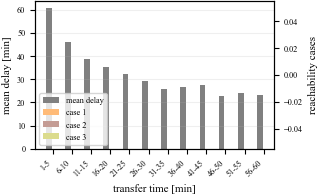

In [3]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

plt.rcParams['font.serif'] = 'Times New Roman'  
plt.rcParams['font.family'] = 'serif'


group_size = 5  

grouped_mean_delays = []
grouped_reachable1 = []
grouped_reachable2 = []
grouped_reachable3 = []

for i in range(0, len(df_mean_delays.switch_times), group_size):
    group_sum_mean_delays = np.sum(df_mean_delays.mean_delay[i:i+group_size])
    grouped_mean_delays.append(group_sum_mean_delays)

    group_sum_reachable1 = np.sum(df_mean_delays.reachable1[i:i+group_size])
    grouped_reachable1.append(group_sum_reachable1)

    group_sum_reachable2 = np.sum(df_mean_delays.reachable2[i:i+group_size])
    grouped_reachable2.append(group_sum_reachable2)

    group_sum_reachable3 = np.sum(df_mean_delays.reachable3[i:i+group_size])
    grouped_reachable3.append(group_sum_reachable3)


x = np.arange(len(grouped_mean_delays))

y_ticks_array = np.arange(0, max(grouped_mean_delays)/group_size+1, 10)


fig, ax1 = plt.subplots()

width = 0.3
ax1.bar(x+1-0.2, np.array(grouped_mean_delays)/group_size, width, color="grey", label="mean delay")

ax1.set_xlabel('transfer time [min]')
ax1.set_ylabel('mean delay [min]')

ax1.set_yticks(y_ticks_array)
ax1.yaxis.grid("major", alpha=0.2)
xticks_array =  [f'{start}-{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x + 1)
ax1.set_xticklabels(xticks_array, rotation=45, ha='right')  





ax2 = ax1.twinx()

bottom = np.zeros(len(grouped_mean_delays))

reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
bar1 = np.array(grouped_reachable1)/reachables_total
bar2 = np.array(grouped_reachable2)/reachables_total
bar3 = np.array(grouped_reachable3)/reachables_total

ax2.bar(x+1+0.2, bar1, width, color="#FFBB78", label="case 1", bottom=bottom+bar2+bar3)
ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="case 2", bottom=bottom+bar3)
ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="case 3", bottom=bottom)

ax2.set_ylabel('reachability cases')

bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(bars1 + bars2, labels1 + labels2, loc="lower left")

plt.savefig("plot_meanDelay_reachability_switchTime.pdf", format="pdf")

plt.show()